In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import matplotlib.pyplot as plt


2024-09-13 12:45:45.426541: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-13 12:45:45.447619: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-13 12:45:45.634844: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-13 12:45:45.864817: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-13 12:45:46.049526: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [2]:
# pip

In [3]:

# Seed settings for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Constants
IMAGE_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 10

def load_and_preprocess_data(data_directory):
    data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

    train_data = data_gen.flow_from_directory(
        data_directory,
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='training'
    )

    val_data = data_gen.flow_from_directory(
        data_directory,
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='validation'
    )

    return train_data, val_data


In [4]:

def build_cnn_model(num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Define dataset directory
dataset_directory = '/home/r-pavani/Current_Projects/SC_ML/SCT_ML_4/train'
train_data, val_data = load_and_preprocess_data(dataset_directory)

num_classes = len(train_data.class_indices)

# Initialize and train the CNN model
cnn_model = build_cnn_model(num_classes)

training_history = cnn_model.fit(
    train_data,
    epochs=EPOCHS,
    validation_data=val_data
)

# Save the trained model
cnn_model.save('hand_gesture_model.h5')

Found 16000 images belonging to 10 classes.
Found 4000 images belonging to 10 classes.


/home/r-pavani/Current_Projects/Amazon_ML/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/home/r-pavani/Current_Projects/Amazon_ML/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


500/500 ━━━━━━━━━━━━━━━━━━━━ 269s 527ms/step - accuracy: 0.8437 - loss: 0.4715 - val_accuracy: 0.8050 - val_loss: 1.2525
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 284s 565ms/step - accuracy: 0.9931 - loss: 0.0240 - val_accuracy: 0.7135 - val_loss: 2.2750
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 292s 581ms/step - accuracy: 0.9965 - loss: 0.0101 - val_accuracy: 0.8085 - val_loss: 1.9968
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 269s 535ms/step - accuracy: 1.0000 - loss: 6.0221e-05 - val_accuracy: 0.7832 - val_loss: 2.4831
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 259s 515ms/step - accuracy: 1.0000 - loss: 6.9548e-06 - val_accuracy: 0.7860 - val_loss: 2.5092
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 291s 580ms/step - accuracy: 1.0000 - loss: 3.4456e-06 - val_accuracy: 0.7885 - val_loss: 2.5286
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 275s 548ms/step - accuracy: 1.0000 - loss: 2.3237e-06 - val_accuracy: 0.7920 - val_loss: 2.5476
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 274s 544ms/step - accuracy: 1.0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


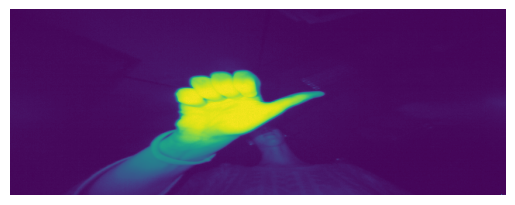

Predicted hand gesture: 05_thumb


In [6]:
def predict_hand_gesture(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=IMAGE_SIZE)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = cnn_model.predict(img_array)
    predicted_class_index = np.argmax(prediction)

    class_labels = list(train_data.class_indices.keys())
    gesture = class_labels[predicted_class_index]

    return gesture

# Define path to test image
test_image_path = '/home/r-pavani/Current_Projects/SC_ML/SCT_ML_4/train/05_thumb/frame_09_05_0199.png'
predicted_gesture = predict_hand_gesture(test_image_path)

# Load and display the test image
test_image = plt.imread(test_image_path)
plt.imshow(test_image)
plt.axis('off')  # Hide axes for better visualization
plt.show()

print(f"Predicted hand gesture: {predicted_gesture}")